In [55]:
forbes <- read.table('../reg2020/forbes.txt', header=T)
t(forbes)

num,1.00,2.00,3.0,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,17.00
temp,194.50,194.30,197.9,198.40,199.40,199.90,200.90,201.10,201.40,201.30,203.60,204.60,209.50,208.60,210.70,211.90,212.20
press,20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06


In [56]:
forbes$Lpress <- 100 * log10(forbes$press)

In [57]:
t(forbes)

num,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.000,9.0000,10.0000,11.0000,12.0000,13.0000,14.0000,15.0000,16.0000,17.0000
temp,194.5000,194.3000,197.9000,198.4000,199.4000,199.9000,200.9000,201.100,201.4000,201.3000,203.6000,204.6000,209.5000,208.6000,210.7000,211.9000,212.2000
press,20.7900,20.7900,22.4000,22.6700,23.1500,23.3500,23.8900,23.990,24.0200,24.0100,25.1400,26.5700,28.4900,27.7600,29.0400,29.8800,30.0600
Lpress,131.7854,131.7854,135.0248,135.5452,136.4551,136.8287,137.8216,138.003,138.0573,138.0392,140.0365,142.4392,145.4692,144.3419,146.2997,147.5381,147.7989


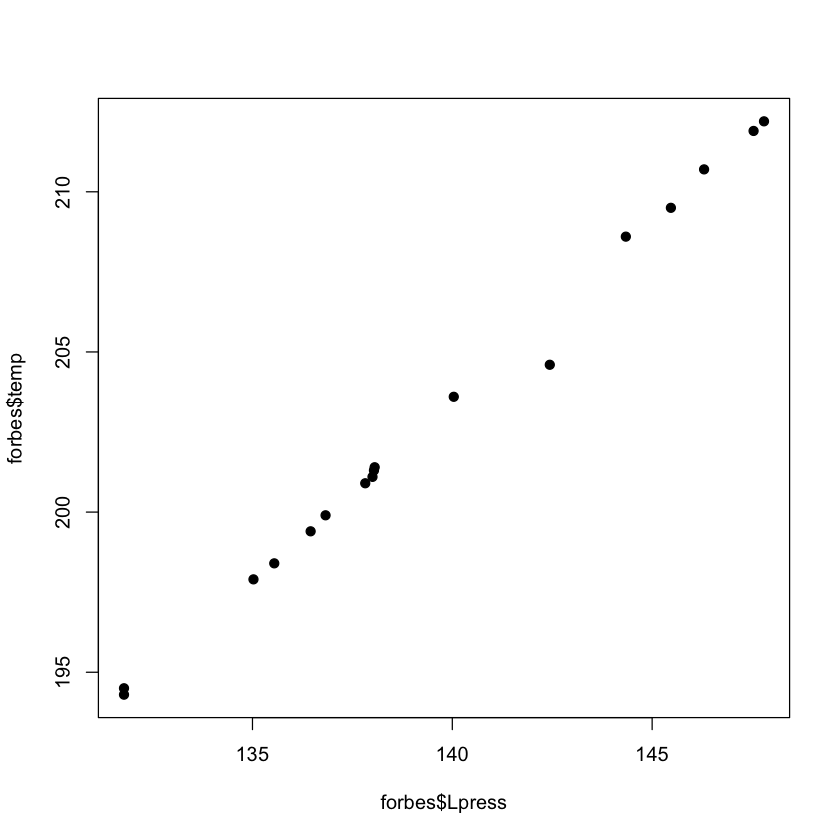

In [58]:
plot(forbes$Lpress, forbes$temp, pch=19)

In [59]:
forbes.lm <- lm(forbes$Lpress ~ forbes$temp)
forbes.lm.summary <- summary(forbes.lm)
forbes.lm.summary


Call:
lm(formula = forbes$Lpress ~ forbes$temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31974 -0.14707 -0.06890  0.01877  1.35994 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.16418    3.34136  -12.62 2.17e-09 ***
forbes$temp   0.89562    0.01646   54.42  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3792 on 15 degrees of freedom
Multiple R-squared:  0.995,	Adjusted R-squared:  0.9946 
F-statistic:  2962 on 1 and 15 DF,  p-value: < 2.2e-16


,num,temp,press,Lpress,forbes.lm$residuals,forbes.lm$fitted.values
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,194.5,20.79,131.7854,-0.24802254,132.0335
2,2,194.3,20.79,131.7854,-0.06889899,131.8543
3,3,197.9,22.40,135.0248,-0.05377004,135.0786
4,4,198.4,22.67,135.5452,0.01877126,135.5264
5,5,199.4,23.15,136.4551,0.03310101,136.4220
6,6,199.9,23.35,136.8287,-0.04111891,136.8698
7,7,200.9,23.89,137.8216,0.05618981,137.7654
8,8,201.1,23.99,138.0030,0.05847608,137.9445
9,9,201.4,24.02,138.0573,-0.15593374,138.2132


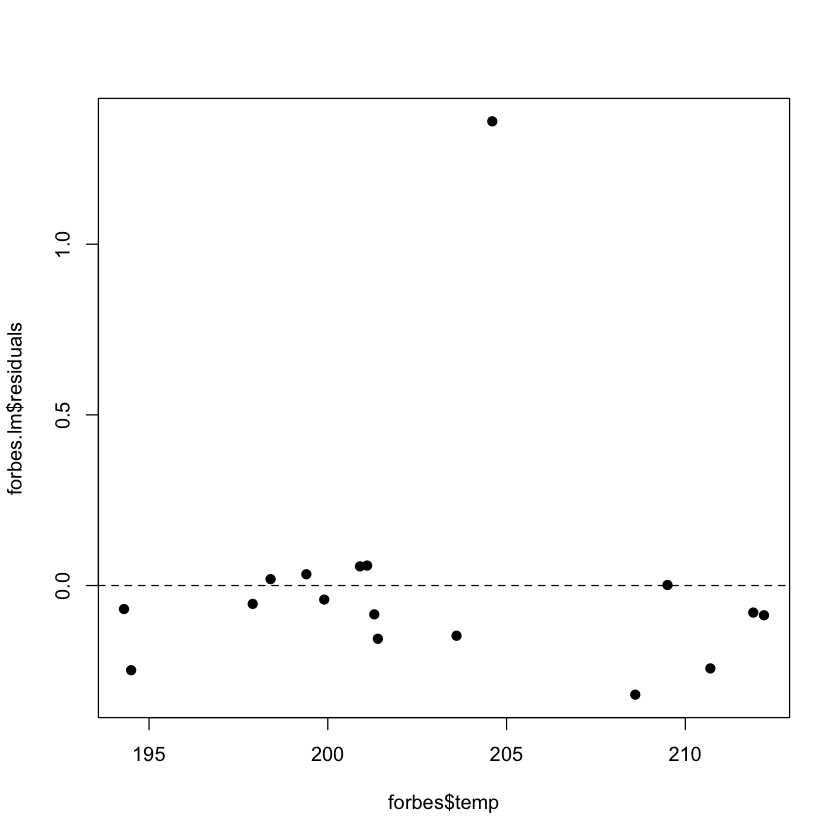

In [60]:
cbind(forbes, forbes.lm$residuals, forbes.lm$fitted.values)
plot(forbes$temp, forbes.lm$residuals, pch=19)
abline(h=0,lty=2)

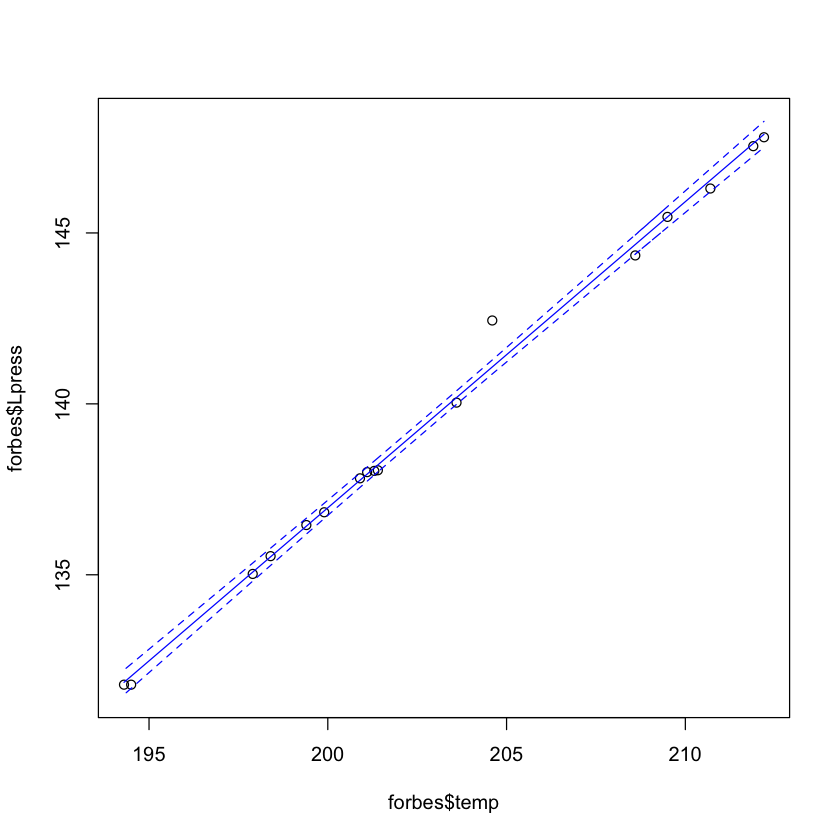

In [72]:
p.x <- data.frame(temp = forbes$temp)
pc <- predict(forbes.lm, int = 'c', newdata = p.x)
pred.x <- p.x$temp
plot(forbes$temp, forbes$Lpress, ylim = range(forbes$Lpress, pc))
matlines(pred.x, pc, lty = c(1, 2, 2), col = 'BLUE')

,fit,lwr,upr
1,194.2671,193.8629,194.6713
2,194.2671,193.8629,194.6713
3,197.8657,197.5702,198.1613
4,198.4438,198.1630,198.7246
5,199.4547,199.1969,199.7124
6,199.8697,199.6202,200.1192
7,200.9728,200.7411,201.2044
8,201.1743,200.9452,201.4034
9,201.2346,201.0062,201.4630
10,201.2145,200.9858,201.4432
